In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline

## Plot different LAS difficulties

### 1. rollout/return

In [7]:
# INSTRUCTION:
# change itv to generate results for 0.125, 0.25 ...
#-----------

import glob
# interval = ["point125","point25","point5","point75","one"]
# interval = ["vpoint1","vpoint3"]
# itv = interval[4]
itv = "ddpg"
csv_dir = "../SHARCNET/Results/Tensorboard_to_CSV/multi/aug_obs/"+itv+"/"
plot_save_dir = './plots_for_thesis/multi/aug_obs/'
if not os.path.exists(plot_save_dir):
    os.makedirs(plot_save_dir)
modes = ["SARA","PLA","Random"]
all_data_files = dict()
for mode in modes:
    mode_data_files = glob.glob(csv_dir+"run_"+ mode +"*.csv")
    mode_data_files.sort()
    print("{}: {} files found".format(mode,len(mode_data_files)))
    for f in mode_data_files:
        print(f)
    all_data_files[mode]=mode_data_files

SARA: 1 files found
../SHARCNET/Results/Tensorboard_to_CSV/multi/aug_obs/ddpg\run_SARA_1571425308gra586_file.csv
PLA: 2 files found
../SHARCNET/Results/Tensorboard_to_CSV/multi/aug_obs/ddpg\run_PLA_1571425307gra1078_file.csv
../SHARCNET/Results/Tensorboard_to_CSV/multi/aug_obs/ddpg\run_PLA_1571425314gra583_file.csv
Random: 0 files found


In [8]:
all_combined_data = dict()

for mode in modes:

    mode_data = []
    for file in all_data_files[mode]:
        mode_data.append(pd.read_csv(file))
        
    # Random has no Q_mean records
    if mode == "Random":
        metrics = ["rollout/return"]
    else:
        metrics = ["rollout/return", "rollout/Q_mean"]
    
    mode_combined_data = pd.DataFrame()
    for metric in metrics:
        metric_combined_data = pd.DataFrame()
        for i in range(len(all_data_files[mode])):
            metric_combined_data[metric+"_run"+str(i)] = mode_data[i][metric]
        metric_combined_data[metric+"_avg"] = metric_combined_data.mean(axis=1)
        metric_combined_data[metric+'_std'] = metric_combined_data.std(axis=1)
        
        mode_combined_data = pd.concat([mode_combined_data,metric_combined_data],axis=1)
    all_combined_data[mode] = mode_combined_data

In [9]:
all_combined_data['SARA']

,rollout/return_run0,rollout/return_avg,rollout/return_std,rollout/Q_mean_run0,rollout/Q_mean_avg,rollout/Q_mean_std
0,17.884930,17.884930,0.0,0.005089,0.005089,0.0
1,22.159029,22.159029,0.0,0.071884,0.071884,0.0
2,20.334116,20.334116,0.0,0.140546,0.140546,0.0
3,37.486446,37.486446,0.0,0.203495,0.203495,0.0
4,38.649391,38.649391,0.0,0.269245,0.269245,0.0
5,42.247150,42.247150,0.0,0.338805,0.338805,0.0
6,44.273811,44.273811,0.0,0.411640,0.411640,0.0
7,44.383831,44.383831,0.0,0.486542,0.486542,0.0
8,43.265354,43.265354,0.0,0.562363,0.562363,0.0
9,43.540283,43.540283,0.0,0.637898,0.637898,0.0


No handles with labels found to put in legend.


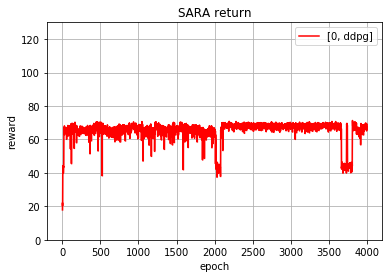

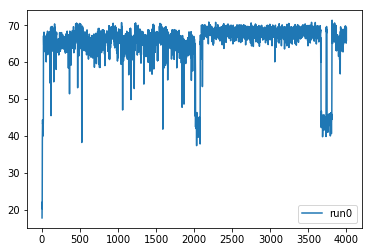

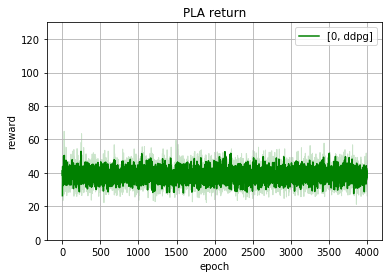

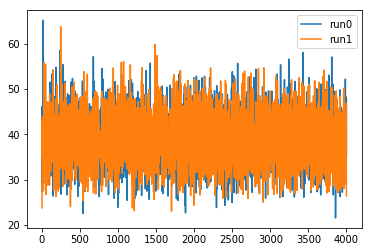

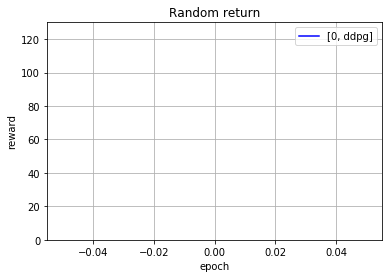

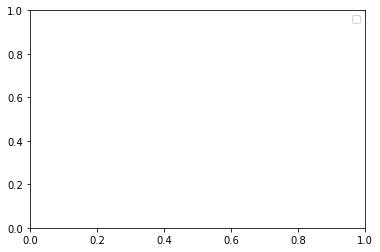

In [10]:
# Plot return
colors = ['r','g','b']
metric = "rollout/return"
me = metric.split('/')[1]
modes = ["SARA","PLA","Random"]
for mode, c in zip(modes, colors):
    plt.figure()
    plt.grid()
    data = all_combined_data[mode]
    length = data.shape[0]
    label = "[0, "+itv.replace("point","0.")+"]"
    plt.fill_between(np.linspace(1,length,length), data[metric+"_avg"] - data[metric+"_std"],
                 data[metric+'_avg'] + data[metric+'_std'], alpha=0.2,
                 color=c)
    plt.plot(np.linspace(1,length,length), data[metric+'_avg'], '-', color=c,
         label=label)
    plt.legend(loc="best")
    plt.ylim([0,130])
    plt.title('{} {}'.format(mode,me))
    plt.xlabel("epoch")
    plt.ylabel("reward")
    plt.savefig(plot_save_dir+'{}_{}_{}.png'.format(itv,mode,me), bbox_inches='tight')
    
    
    plt.figure()
    for j in range(len(all_data_files[mode])):
        plt.plot(np.linspace(1,length,length), data[metric+'_run{}'.format(j)], '-', label="run"+str(j))
    plt.legend()


### 2.rollout/Q_mean

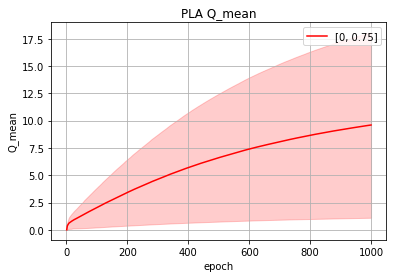

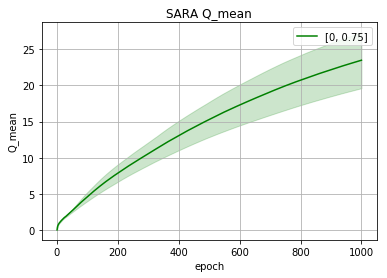

In [36]:
colors = ['r','g','b']
metric = "rollout/Q_mean"
modes = ["PLA","SARA"]
me = metric.split('/')[1]
for mode, c in zip(modes, colors):
    plt.figure()
    plt.grid()
    data = all_combined_data[mode]
    length = data.shape[0]
    label = "[0, "+itv.replace("point","0.")+"]"
    plt.fill_between(np.linspace(1,1000,length), data[metric+"_avg"] - data[metric+"_std"],
                 data[metric+'_avg'] + data[metric+'_std'], alpha=0.2,
                 color=c)
    plt.plot(np.linspace(1,1000,length), data[metric+'_avg'], '-', color=c,
         label=label)
    plt.legend(loc="best")
#     plt.ylim([0,27])
    plt.title('{} {}'.format(mode,me))
    plt.xlabel("epoch")
    plt.ylabel("Q_mean")
    plt.savefig(plot_save_dir+'{}_{}_{}.png'.format(itv,mode,me), bbox_inches='tight')
    

---------------------

## Plot different visitor randomness

In [14]:
# INSTRUCTION:
# change itv to generate results for 0.125, 0.25 ...
#-----------

import glob
# interval = ["point125","point25","point5","point75","one"]
interval = ["vpoint1","vpoint3"]
itv = interval[1]
# itv = "ddpg"
csv_dir = "../SHARCNET/Results/Tensorboard_to_CSV/multi/lazy_visitor_w_randomess/"+itv+"/"
plot_save_dir = './plots_for_thesis/multi/lazy_visitor_w_randomess/'
if not os.path.exists(plot_save_dir):
    os.makedirs(plot_save_dir)
modes = ["SARA","PLA","Random"]
all_data_files = dict()
for mode in modes:
    mode_data_files = glob.glob(csv_dir+"run_"+ mode +"*.csv")
    mode_data_files.sort()
    print("{}: {} files found".format(mode,len(mode_data_files)))
    for f in mode_data_files:
        print(f)
    all_data_files[mode]=mode_data_files

SARA: 3 files found
../SHARCNET/Results/Tensorboard_to_CSV/multi/lazy_visitor_w_randomess/vpoint3\run_SARA_1571001853gra136_file.csv
../SHARCNET/Results/Tensorboard_to_CSV/multi/lazy_visitor_w_randomess/vpoint3\run_SARA_1571151748gra1046_file.csv
../SHARCNET/Results/Tensorboard_to_CSV/multi/lazy_visitor_w_randomess/vpoint3\run_SARA_1571151751gra1045_file.csv
PLA: 2 files found
../SHARCNET/Results/Tensorboard_to_CSV/multi/lazy_visitor_w_randomess/vpoint3\run_PLA_1571001851gra134_file.csv
../SHARCNET/Results/Tensorboard_to_CSV/multi/lazy_visitor_w_randomess/vpoint3\run_PLA_1571001854gra137_file.csv
Random: 4 files found
../SHARCNET/Results/Tensorboard_to_CSV/multi/lazy_visitor_w_randomess/vpoint3\run_Random_1571002089gra20_file.csv
../SHARCNET/Results/Tensorboard_to_CSV/multi/lazy_visitor_w_randomess/vpoint3\run_Random_1571002095gra707_file.csv
../SHARCNET/Results/Tensorboard_to_CSV/multi/lazy_visitor_w_randomess/vpoint3\run_Random_1571152021gra610_file.csv
../SHARCNET/Results/Tensorboar

In [15]:
all_combined_data = dict()

for mode in modes:

    mode_data = []
    for file in all_data_files[mode]:
        mode_data.append(pd.read_csv(file))
        
    # Random has no Q_mean records
    if mode == "Random":
        metrics = ["rollout/return"]
    else:
        metrics = ["rollout/return", "rollout/Q_mean"]
    
    mode_combined_data = pd.DataFrame()
    for metric in metrics:
        metric_combined_data = pd.DataFrame()
        for i in range(len(all_data_files[mode])):
            metric_combined_data[metric+"_run"+str(i)] = mode_data[i][metric]
        metric_combined_data[metric+"_avg"] = metric_combined_data.mean(axis=1)
        metric_combined_data[metric+'_std'] = metric_combined_data.std(axis=1)
        
        mode_combined_data = pd.concat([mode_combined_data,metric_combined_data],axis=1)
    all_combined_data[mode] = mode_combined_data

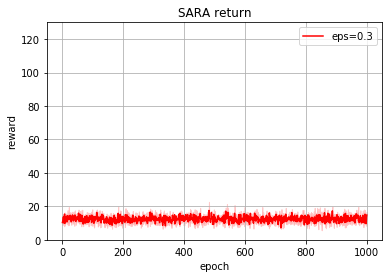

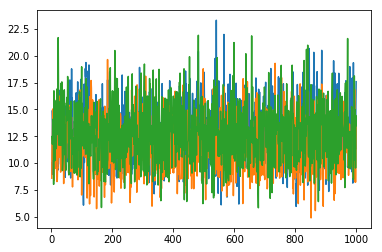

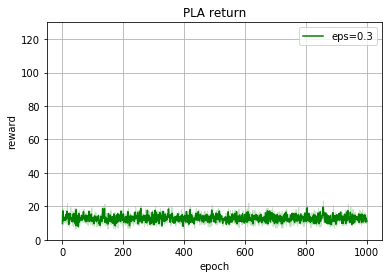

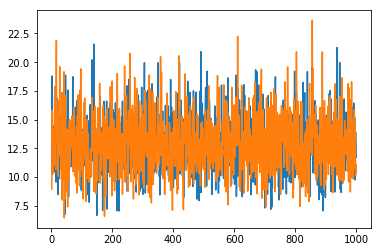

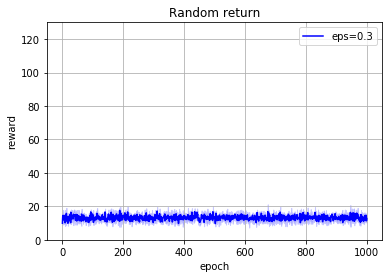

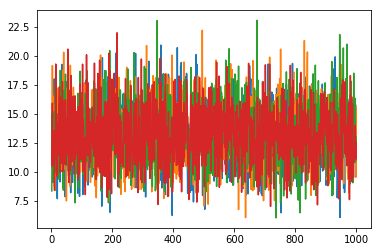

In [16]:
# Plot return
colors = ['r','g','b']
metric = "rollout/return"
me = metric.split('/')[1]
modes = ["SARA","PLA","Random"]
for mode, c in zip(modes, colors):
    plt.figure()
    plt.grid()
    data = all_combined_data[mode]
    length = data.shape[0]
    label = "eps="+itv.replace("vpoint","0.")
    plt.fill_between(np.linspace(1,length,length), data[metric+"_avg"] - data[metric+"_std"],
                 data[metric+'_avg'] + data[metric+'_std'], alpha=0.2,
                 color=c)
    plt.plot(np.linspace(1,length,length), data[metric+'_avg'], '-', color=c,
         label=label)
    plt.legend(loc="best")
    plt.ylim([0,130])
    plt.title('{} {}'.format(mode,me))
    plt.xlabel("epoch")
    plt.ylabel("reward")
    plt.savefig(plot_save_dir+'{}_{}_{}.png'.format(itv,mode,me), bbox_inches='tight')
    
    
    plt.figure()
    for j in range(len(all_data_files[mode])):
        plt.plot(np.linspace(1,length,length), data[metric+'_run{}'.format(j)], '-', label=label)


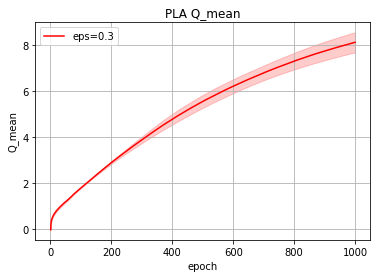

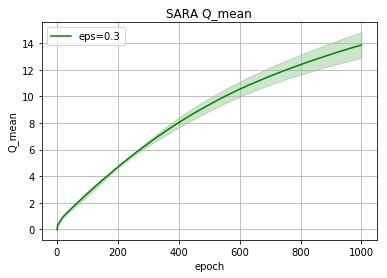

In [17]:
colors = ['r','g','b']
metric = "rollout/Q_mean"
modes = ["PLA","SARA"]
me = metric.split('/')[1]
for mode, c in zip(modes, colors):
    plt.figure()
    plt.grid()
    data = all_combined_data[mode]
    length = data.shape[0]
    label = "eps="+itv.replace("vpoint","0.")
    plt.fill_between(np.linspace(1,1000,length), data[metric+"_avg"] - data[metric+"_std"],
                 data[metric+'_avg'] + data[metric+'_std'], alpha=0.2,
                 color=c)
    plt.plot(np.linspace(1,1000,length), data[metric+'_avg'], '-', color=c,
         label=label)
    plt.legend(loc="best")
#     plt.ylim([0,27])
    plt.title('{} {}'.format(mode,me))
    plt.xlabel("epoch")
    plt.ylabel("Q_mean")
    plt.savefig(plot_save_dir+'{}_{}_{}.png'.format(itv,mode,me), bbox_inches='tight')
    